# Métodos não supervisionados - DBSCAN

Você tem em mãos dados de perfis de clientes um shopping e para entender melhor o perfil, pediram para você analisar esses dados em busca de insights.

Para entender melhor o perfil de cada cliente, você deve fazer uma clusterização com o método [DBSCAN](https://www.maxwell.vrac.puc-rio.br/24787/24787_6.PDF) e dizer qual é o perfil médio de dos clientes de cada cluster.

Você pode ler informações sobre esse dataset nesse link do [Kaggle](https://www.kaggle.com/kandij/mall-customers?select=Mall_Customers.csv).

Para fazer a análise, você precisa:
- Tratar os dados e observar as estatísticas descritivas e distribuições dos dados
- Tratar outliers caso necessário
- Fazer uma transformação para standarizar os dados
- Definir a distância de vizinhaça
- Fazer o DBSCAN
- Entender quais os perfis dos clusters e tentar caracterizar os clusters


In [ ]:
#aqui tem as bibliotecas que vamos utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

## 1) Importação dos dados

Aqui você deve exportar os dados do kaggle para o colab.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers (1).csv to Mall_Customers (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers (1).csv']))

## 2) Tratamento, estatísticas descritivas e visualização dos dados

In [ ]:
df.describe() #estatisticas descritivas

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isna().sum() #aqui estamos vendo se o quanto de valores vazios temos no dataset

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df = df.drop(['CustomerID'], axis=1) # aqui vamos excluir a coluna de ID dos usuários

In [ ]:
df['genre_Cat'] = LabelEncoder().fit_transform(df['Genre'])
print(df)
# aqui a gente transforma o gênero em um valor numérico (male=1 e female=0)
df = df.drop(['Genre'], axis=1)

      Genre  Age  Annual Income (k$)  Spending Score (1-100)  genre_Cat
0      Male   19                  15                      39          1
1      Male   21                  15                      81          1
2    Female   20                  16                       6          0
3    Female   23                  16                      77          0
4    Female   31                  17                      40          0
..      ...  ...                 ...                     ...        ...
195  Female   35                 120                      79          0
196  Female   45                 126                      28          0
197    Male   32                 126                      74          1
198    Male   32                 137                      18          1
199    Male   30                 137                      83          1

[200 rows x 5 columns]


### 2.1) Histograma dos dados



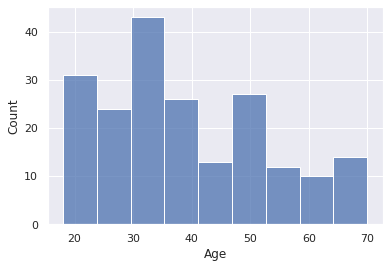

In [ ]:
sns.histplot(x="Age", data=df)

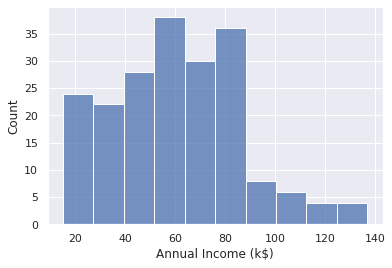

In [ ]:
sns.histplot(x="Annual Income (k$)", data=df)

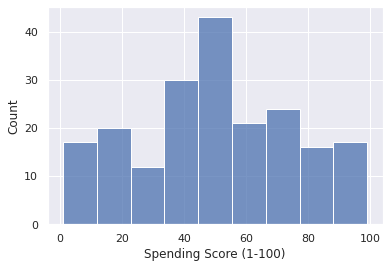

In [ ]:
sns.histplot(x="Spending Score (1-100)", data=df)

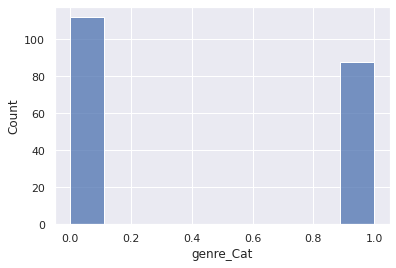

In [ ]:
sns.histplot(x='genre_Cat', data=df)

### 2.2) Tratamento de outliers

Dado os histogramas, não será necessário tratar outliers

In [ ]:
df.describe() # aqui vemos que o dataset sem outlier ficou com 72% do tamanho original

,Age,Annual Income (k$),Spending Score (1-100),genre_Cat
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


### 2.3) Determinação do valor da distância entre vizinhos

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

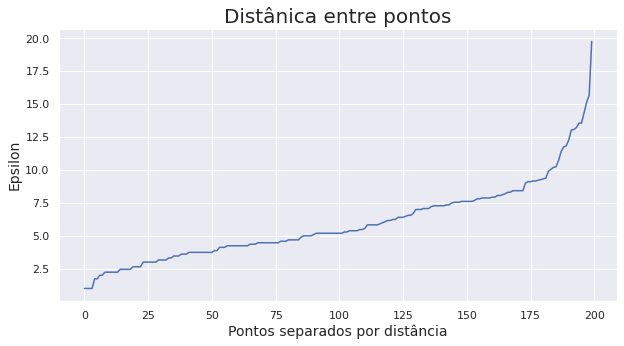

In [ ]:

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Distânica entre pontos',fontsize=20)
plt.xlabel('Pontos separados por distância',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

A distância mínima que vamos utilizar é de 13. O número mínumo de

### 2.4) Treinamento do modelo

In [ ]:
db = DBSCAN(eps=13, min_samples=5).fit(df)
labels = db.labels_
df['cluster']=labels.astype('str')

In [ ]:
df2=pd.DataFrame(db.labels_)
df2.value_counts()
#aqui temos a distribuição de pessoas por cluster
#temos 4 clusteres e 32 outliers

 0    109
 2     34
-1     32
 3     18
 1      7
dtype: int64

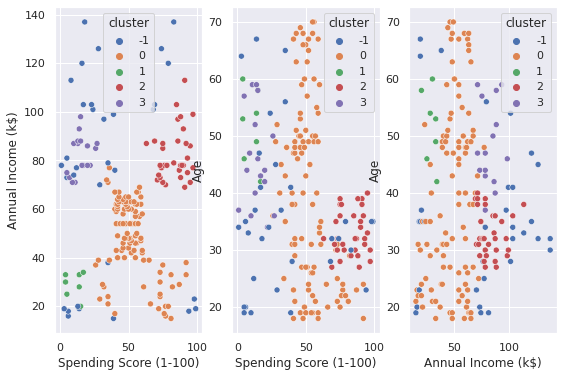

In [ ]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
f, axes = plt.subplots(1, 3,figsize=(9, 6))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='cluster',ax=axes[0])
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Age',hue='cluster',ax=axes[1])
sns.scatterplot(data=df,x='Annual Income (k$)',y='Age',hue='cluster',ax=axes[2])

## 3) Análise dos clusteres



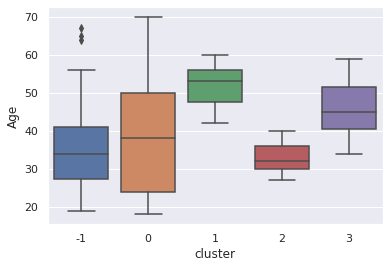

In [ ]:
sns.boxplot(x="cluster", y="Age", data=df)

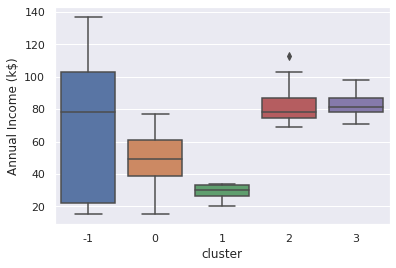

In [ ]:
sns.boxplot(x="cluster", y="Annual Income (k$)", data=df)

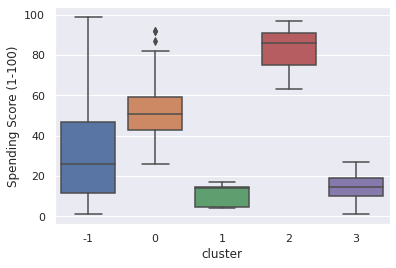

In [ ]:
sns.boxplot(x="cluster", y="Spending Score (1-100)", data=df)

In [ ]:
df.groupby(['cluster', 'genre_Cat']).size()

cluster  genre_Cat
-1       0            18
         1            14
0        0            63
         1            46
1        0             5
         1             2
2        0            19
         1            15
3        0             7
         1            11
dtype: int64

## 4) Conclusão

Ao observar os clusteres e a descrição de cada variável, temos algumas variáveis que os boxplots mostram diferenças entre populações de forma que podemos criar 4 perfis. Antes de tudo, temos uma uniformidade dos outliers referenciados ao cluster -1.

O cluster 0 é composto por clientes de idades variadas mas com pontuação de gastos média e rendimento anual médio
O cluster 1 é composto por clientes de mais idade mas com pontuação de gastos  mais baixa e rendimento anual baixo.
O cluster 2 é composto por clientes adultos com alta pontuação de gastos e rendimento anual alto.
O cluster 3 é composto por clientes de meia idade mas com pontuação de gastos  mais baixa e rendimento anual alto.
